# 0. Introduction (Ryan or Alina?) Ryan please :)

Pre-requisites, learning goals, format, etc...

# 1. Brief Jupyter overview (Aaron)

## 1.1 Installation, environments; get oriented

Q: What is the difference between `pip install`, versus Conda (or Miniconda, Anaconda), versus `virtualenv`?  (mainly for OS X and Unix users)

A: python + libraries are installed and "searched for" in different places (roughly speaking).

__TODO__ need a transcript of shell commands for this exercise, not done yet --ATr, 2022 July 18

We will open up and use a _terminal_ to see where Python and Jupyter are installed.  Relevant commands:
`which`, `pip install`, `pip install --local`, `conda`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
np.__version__

In [ ]:
np.__file__

## 1.2 Using and navigating Jupyter

* Code and text cells.
* Command vs. insert mode: mouse click, `Esc`, `Return`
* Execute cell: `Shift`+`Return`
* Keyboard shortcuts in command mode: `a`, `b`, `x`, `c`, `v`, `dd`, `z`
* "Restart kernel and run all cells"

In [ ]:
x = 10

In [ ]:
y = 1

In [ ]:
x + y  # during interactive Jupyter or IPython session, this is the same as print(x+y)

In [ ]:
y = 20


## 1.3 Useful tricks

Markdown allows rich content: images, equations, HTML.  Example of a LaTeX equation that you can edit:

$$
  \sum_{n=0}^{\infty} \frac{1}{x^n} = \frac{1}{1-1/x}
$$

The IPython kernel within Jupyter has many useful tricks.  Let's look at a few:
* `?` to get help, `??` to look at source.
* `%pwd`, `%history`
* `%%timeit` to benchmark your code
* `%matplotlib inline`
* `%load_ext autoreload`

In [ ]:
range?

In [ ]:
for x in range(10):
    print(x)

In [ ]:
#%%timeit
x = 0
for y in range(10000):
    x += y
print(x)

In [ ]:
np.arange?

In [ ]:
np.arange??

In [ ]:
for x in np.arange(10):
    print(x)

In [ ]:
#%%timeit
x = np.sum(np.arange(10000))
print(x)

In [ ]:
%pwd

In [ ]:
%history -l 5

In [ ]:
x = np.arange(100)
y = np.random.random(100)

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
import my_module

In [ ]:
my_module.foobar(10)

In [ ]:
%load_ext autoreload

%autoreload 2

## 1.4 Other notes

* How to run Jupyter notebook from a remote computer (e.g., if you have many GB or TB of data that won't fit on your computer): https://confluence.columbia.edu/confluence/display/rcs/Ginsburg+-+Job+Examples#GinsburgJobExamples-JupyterNotebooks

## 1.5 References and Further Reading

* Intro to Python, Jupyter, Pandas, Matplotlib: http://swcarpentry.github.io/python-novice-gapminder/

* IPython magic commands (`%` and `%%`): https://ipython.readthedocs.io/en/stable/interactive/magics.html

* IPython autoreload: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html

# 2. Getting the most out of NumPy

Python, in general, is slow; compared to compiled languages like C and Fortran, Python is woefully inefficient. But, this is where the magic of NumPy come into play: by wrapping C data structures and methods in Python commands, NumPy drastically speeds up array operations and numerical calculations. Learning to use NumPy properly 

In [ ]:
# python lists vs. numpy arrays; memory comparison and append comparison

In [ ]:
# loop vs. array operations demo; examples of where we can get rid of loops

In [ ]:
# array slicing, np.where, and masking

In [ ]:
# np.vectorize and numpy functional programming

This is an introduction to stuff 

In [ ]:
# Alina's stuff

In [ ]:
# Useful Scipy functions (scipy.)

In [ ]:
from scipy.optimize import curve_fit, fsolve
from scipy import interpolate

In [ ]:
#define Planck's function
def BB_lambdaT(l, T):
  
  #define constants (SI units)
  hplanck=6.62607015e-34 #m^2kg/s
  clight=299792458. #m/s
  kb=1.380649e-23 #m^2kg/(s^2K^1)
  
  return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.)


In [ ]:

lambda_sun=np.linspace(100e-9, 2000e-9, 100) #wavelength range [m]
T_sun=5778 # sun's temp [K]
sun_BB=BB_lambdaT(lambda_sun, T_sun)
noise=0.2*np.random.normal(size=len(lambda_sun))
sun_data=BB_sun+noise

In [ ]:
BB_params, BB_cov = curve_fit(BB_lambdaT, sun_data, ydata)

Text(0, 0.5, 'intensity [kW/m$^{2}$/nm]')

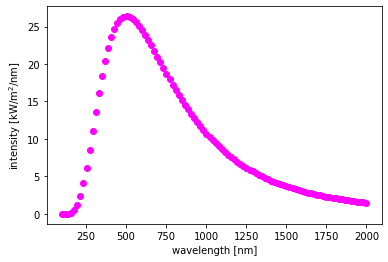

In [ ]:
plt.figure()
plt.scatter(lambda_sun*1.e9, BB_sun_data/1.e12, marker='o',label='data', color='magenta')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'intensity [kW/m$^{2}$/nm]')

In [ ]:
## curve_fit

In [ ]:
## interpolate

In [ ]:
## 

In [ ]:
# Reading & Writing Files with NumPy and AstroPy

# 4. Check your work -- units in AstroPy

What is inside astropy's `units` submodule?  Quoting the [documentation](https://docs.astropy.org/en/stable/units/index.html),

> `astropy.units` handles defining, converting between, and performing arithmetic with physical quantities, such as meters, seconds, Hz, etc. It also handles logarithmic units such as magnitude and decibel.
> 
> `astropy.units` does not know spherical geometry or sexagesimal (hours, min, sec): if you want to deal with celestial coordinates, see the `astropy.coordinates` package.

Let's have a look at its capabilities.

## 4.1 Overview of astropy.units

Just a glimpse, not comprehensive -- much more is in the documentation and various online tutorials.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy

from astropy import units as u

%matplotlib inline

In [2]:
u.m

Unit("m")

In [3]:
u.meter

Unit("m")

In [4]:
u.picometer

Unit("pm")

In [5]:
u.picometer.to(u.m)

1e-12

In [6]:
u.picometer.to(u.g)

UnitConversionError: 'pm' (length) and 'g' (mass) are not convertible

In [7]:
force = 5 * u.m * u.kg / u.s**2

In [8]:
force

<Quantity 5. kg m / s2>

In [9]:
force.unit

Unit("kg m / s2")

In [10]:
force.value

5.0

In [11]:
force.to(u.N)

<Quantity 5. N>

In [12]:
force.cgs

<Quantity 500000. dyn>

## 4.2 Doing math with units

Let's return to the Planck blackbody function as a motivating example.

$$
    B_{\lambda}(\lambda, T)
    = \frac{2 h c^2}{\lambda^5}
    \frac{1}{\exp\left(\frac{hc}{\lambda k_B T} -1\right)}
$$

with Planck's constant $h$, speed of light $c$, and Boltzmann constant $k_B$.

Planck's function, expressed in per-wavelength form ($B_\lambda$ rather than $B_\nu$), has units of radiance per wavelength.  That is power, per steradian, per area, per wavelength.  Phew!


How would we program this function with units?  How does having units help us?  First, let's write down the expected units in "reduced" form -- astropy can help us with this, again.

In [43]:
u.Watt / u.steradian / u.m**2 / u.m

Unit("W / (m3 sr)")

In [44]:
(u.Watt / u.steradian / u.m**2 / u.m).decompose()

Unit("kg / (m rad2 s3)")

In [13]:
#define Planck's function
def BB_lambdaT(l, T):
    #define constants (SI units)
    hplanck=6.62607015e-34 #m^2kg/s
    clight=299792458. #m/s
    kb=1.380649e-23 #m^2kg/(s^2K^1)
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.)

In [14]:
from astropy import constants as const

In [15]:
const.h

<<class 'astropy.constants.codata2014.CODATA2014'> name='Planck constant' value=6.62607004e-34 uncertainty=8.1e-42 unit='J s' reference='CODATA 2014'>

In [16]:
const.c

<<class 'astropy.constants.codata2014.CODATA2014'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2014'>

In [17]:
const.k_B

<<class 'astropy.constants.codata2014.CODATA2014'> name='Boltzmann constant' value=1.38064852e-23 uncertainty=7.9e-30 unit='J / K' reference='CODATA 2014'>

In [18]:
def BB_lambdaT(l, T):
    """
    Planck's blackbody function per unit wavelength, which has units of
    power per solid angle per unit area per unit wavelength.
    
    Arguments:
        l: wavelength in astropy units (length)
        T: temperature in astropy units (Kelvin)
    Returns:
        value(s) of Planck's function evaluated at (l, T) with astropy units attached
    """
    hplanck = const.h
    clight = const.c
    kb = const.k_B
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.)

Now, if we forget to put in units, we get a `UnitConversionError`.

In [19]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) #wavelength range [m]
T_sun = 5778 # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

UnitTypeError: Can only apply 'exp' function to dimensionless quantities

Let's attach units.  What happens if, hypothetically, we accidentally put the units in backwards?

In [39]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m
T_sun = 5778 * u.K
sun_BB = BB_lambdaT(T_sun, lambda_sun)  # this is backwards!

In [42]:
sun_BB.unit.decompose()

Unit("kg m4 / (K5 rad2 s3)")

Let's attach units.  Now it works!

In [20]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m #wavelength range [m]
T_sun = 5778 * u.K # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

In [21]:
sun_BB.unit

Unit("J / (m3 s)")

Woops, we are missing a unit!  We need to attach the "per-steradian" piece manually, because steradians don't show up in the constants $h$, $c$, $k_B$, nor in our inputs $\lambda$, $T$, 

In [22]:
def BB_lambdaT(l, T):
    """
    Planck's blackbody function per unit wavelength, which has units of
    power per solid angle per unit area per unit wavelength.
    
    Arguments:
        l: wavelength in astropy units (length)
        T: temperature in astropy units (Kelvin)
    Returns:
        value(s) of Planck's function evaluated at (l, T) with astropy units attached
    """
    hplanck = const.h
    clight = const.c
    kb = const.k_B
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.) / u.sr

In [29]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m #wavelength range [m]
T_sun = 5778 * u.K # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

In [30]:
sun_BB.unit

Unit("J / (m3 s sr)")

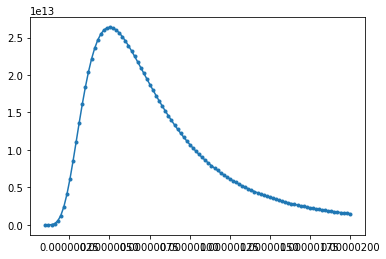

In [31]:
plt.plot(lambda_sun, sun_BB, '.-')
plt.show()

In [32]:
from astropy import visualization

In [33]:
astropy.visualization.quantity_support?

Signature: astropy.visualization.quantity_support(format='latex_inline')
Docstring:
Enable support for plotting `astropy.units.Quantity` instances in
matplotlib.

May be (optionally) used with a ``with`` statement.

  >>> import matplotlib.pyplot as plt
  >>> from astropy import units as u
  >>> from astropy import visualization
  >>> with visualization.quantity_support():
  ...     plt.figure()
  ...     plt.plot([1, 2, 3] * u.m)
  [...]
  ...     plt.plot([101, 125, 150] * u.cm)
  [...]
  ...     plt.draw()

Parameters
----------
format : `astropy.units.format.Base` instance or str
    The name of a format or a formatter object.  If not
    provided, defaults to ``latex_inline``.
File:      ~/anaconda3/lib/python3.7/site-packages/astropy/visualization/units.py
Type:      function


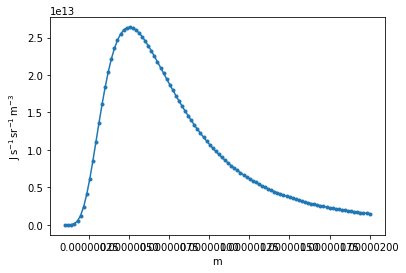

In [34]:
with astropy.visualization.quantity_support():
    plt.plot(lambda_sun, sun_BB, '.-')
    plt.show()

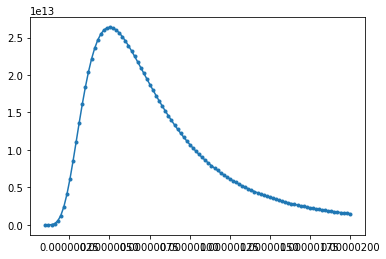

In [35]:
plt.plot(lambda_sun, sun_BB, '.-')
plt.show()

In [36]:
astropy.visualization.quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fb35441edd0>

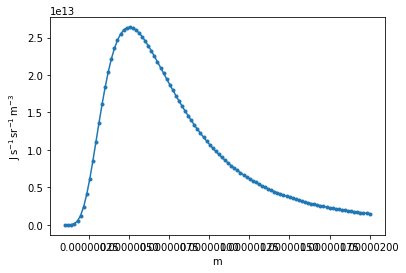

In [37]:
plt.plot(lambda_sun, sun_BB, '.-')
plt.show()

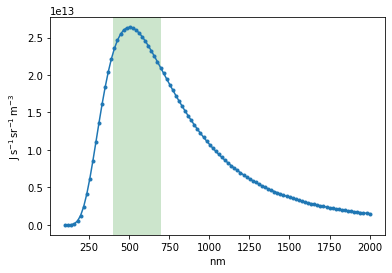

In [38]:
plt.plot(lambda_sun.to(u.nm), sun_BB, '.-')
plt.axvspan(4000*u.Angstrom, 7000*u.Angstrom, facecolor='g', alpha=0.2)
plt.show()

## 4.3 Extra bits: more defensive programming, making your own code module

We've seen that units help us write correct code.

As we write our code, units can show whether we have our constants, variables, and exponents all lined up right.

And, after writing our code, units can help us catch incorrect inputs.

What if we give correct units, but totally un-physical values to the blackbody function?

In [75]:
BB_lambdaT(-100*u.m, -1000*u.K)

<Quantity -8.27815967e-20 J / (m3 s sr)>

In [45]:
def BB_lambdaT(l, T):
    """
    Planck's blackbody function per unit wavelength, which has units of
    power per solid angle per unit area per unit wavelength.
    
    Arguments:
        l: wavelength in astropy units (length)
        T: temperature in astropy units (Kelvin)
    Returns:
        value(s) of Planck's function evaluated at (l, T) with astropy units attached
    """
    assert l >= 0
    assert T >= 0
    hplanck = const.h
    clight = const.c
    kb = const.k_B
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.) / u.sr

In [46]:
BB_lambdaT(-100*u.m, -1000*u.K)

AssertionError: 

Let's do a "regression test" --  we'll make sure the function still works the same way on previous input, to ensure we didn't break anything.

In [48]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m #wavelength range [m]
T_sun = 5778 * u.K # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Woops, we did break something!  Let's fix it.

In [49]:
def BB_lambdaT(l, T):
    """
    Planck's blackbody function per unit wavelength, which has units of
    power per solid angle per unit area per unit wavelength.
    
    Arguments:
        l: wavelength in astropy units (length)
        T: temperature in astropy units (Kelvin)
    Returns:
        value(s) of Planck's function evaluated at (l, T) with astropy units attached
    """
    assert np.any(l >= 0)
    assert np.any(T >= 0)
    hplanck = const.h
    clight = const.c
    kb = const.k_B
    return (2.*hplanck*clight**2/l**5)/(np.exp(hplanck*clight/(l*kb*T))-1.) / u.sr

In [50]:
BB_lambdaT(-100*u.m, -1000*u.K)

AssertionError: 

In [51]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m #wavelength range [m]
T_sun = 5778 * u.K # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

In [53]:
sun_BB

<Quantity [1.82632795e+08, 4.18444757e+09, 3.59544183e+10, 1.68084796e+11,
           5.26116543e+11, 1.24862953e+12, 2.43120770e+12, 4.09195085e+12,
           6.17075030e+12, 8.55205431e+12, 1.10950860e+13, 1.36601140e+13,
           1.61260087e+13, 1.83989754e+13, 2.04145105e+13, 2.21350783e+13,
           2.35456222e+13, 2.46483975e+13, 2.54580214e+13, 2.59971973e+13,
           2.62932746e+13, 2.63756353e+13, 2.62738118e+13, 2.60162077e+13,
           2.56292906e+13, 2.51371391e+13, 2.45612444e+13, 2.39204890e+13,
           2.32312415e+13, 2.25075225e+13, 2.17612095e+13, 2.10022581e+13,
           2.02389248e+13, 1.94779808e+13, 1.87249117e+13, 1.79840997e+13,
           1.72589870e+13, 1.65522210e+13, 1.58657807e+13, 1.52010874e+13,
           1.45590999e+13, 1.39403960e+13, 1.33452421e+13, 1.27736526e+13,
           1.22254396e+13, 1.17002546e+13, 1.11976242e+13, 1.07169790e+13,
           1.02576783e+13, 9.81902978e+12, 9.40030646e+12, 9.00075997e+12,
           8.61963158e+12

In [54]:
lambda_sun = np.linspace(100e-9, 2000e-9, 100) * u.m #wavelength range [m]
T_sun = -1 * 5778 * u.K # sun's temp [K]
sun_BB = BB_lambdaT(lambda_sun, T_sun)

AssertionError: 

## 4.3 Some remarks on the use of units

* Advantages and disadvantages of using an external code library for your units.
  + Pro: simplicity, convenience, don't repeat existing information
  + Pro: consistent constants for all your work (is electron mass 1e-27 or 9.1093837e-28 grams?).
    Might help root out subtle bugs or disagreements
  + Con: sometimes, more complex than you need.  You have to _trust_ the external library!
  + Con: dependency.
  + Con: performance overhead.  https://docs.astropy.org/en/stable/units/index.html#performance-tips


* Other libraries and contenders?  Why should we use astropy units specifically?
  + Wolfram|Alpha, for quick one-off calculations: https://www.wolframalpha.com/
  + `yt` and `unyt` provide unit-aware interfaces for simulation outputs: https://yt-project.org/
  + Many other specialized packages will provide their own unit packages.  Different packages / systems may not talk easily with one another (but, can be aided by projects like `yt`).  Example from a well-used magnetohydrodynamics code: https://arepo-code.org/wp-content/userguide/parameterfile.html#system-of-units
  + What's the "best" unit system to use?  How do you judge whether a library is trustworthy, accurate, and bug free?
    Many factors, including personal preference.  Some discussion on page 3 of:
    https://joss.theoj.org/papers/10.21105/joss.00809


## 4.4 References

* Documentation: https://docs.astropy.org/en/stable/units/index.html
* Tutorials on astropy units specifically:
  + (recommended) https://learn.astropy.org/tutorials/quantities.html
  + https://astropy4cambridge.readthedocs.io/en/latest/_static/Astropy%20-%20Unit%20Conversion.html
* Going farther than necessary...
  + Dimensional analysis is a powerful tool. Some search terms: dimensional analysis, scaling laws, self-similariy, Buckingham $\pi$ theorem.
  + A math-y reference: "Scaling" by G. I. Barenblatt https://www.cambridge.org/core/books/scaling/E08325F4C8A14AAD4742E39FE5D0A6B3

# 5. Parting thoughts on scientific computing, generally


* Digging deeper: what's in the `[source]`?
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html


* Mathematica notebooks (from 1988, before Python's first release in 1991(!)) helped pave the way towards IPython / Jupyter.  A very powerful tool, _especially_ for symbolic mathematics.  Downsides: proprietary/closed source, cost.  Free license for Columbia students: https://www.cuit.columbia.edu/content/mathematica


* Some suggested best practices in scientific computing: https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1001745


* A bit on programming philosophy.
  + Coding style, much is not relevant for scientific programming, but some useful tidbits / inspiration. https://google.github.io/styleguide/pyguide.html
  + Example: how to write a good comment or docstring?  You'll thank yourself in 1-2 years.
    https://google.github.io/styleguide/pyguide.html#s3.8-comments-and-docstrings
  + "Everyone knows that debugging is twice as hard as writing a program in the first place. So if you're as clever as you can be when you write it, how will you ever debug it?"  -- Brian Kernighan, The Elements of Programming Style
